In [253]:
%matplotlib inline
from matplotlib import style
style.use('seaborn-dark')
import matplotlib.pyplot as plt
from sqlalchemy import desc
import numpy as np
import pandas as pd
import datetime as dt



# Reflect Tables into SQLAlchemy ORM

In [254]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from flask import Flask,jsonify

In [260]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [259]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [257]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [241]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [242]:
# Create our session (link) from Python to the DB
session = Session(engine)
app = Flask(__name__)

# Exploratory Climate Analysis

In [244]:
@app.route("/")
def welcome():
    """List all available api routes."""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/<start><br/>"
        f"/api/v1.0/<start>/<end>"
    )


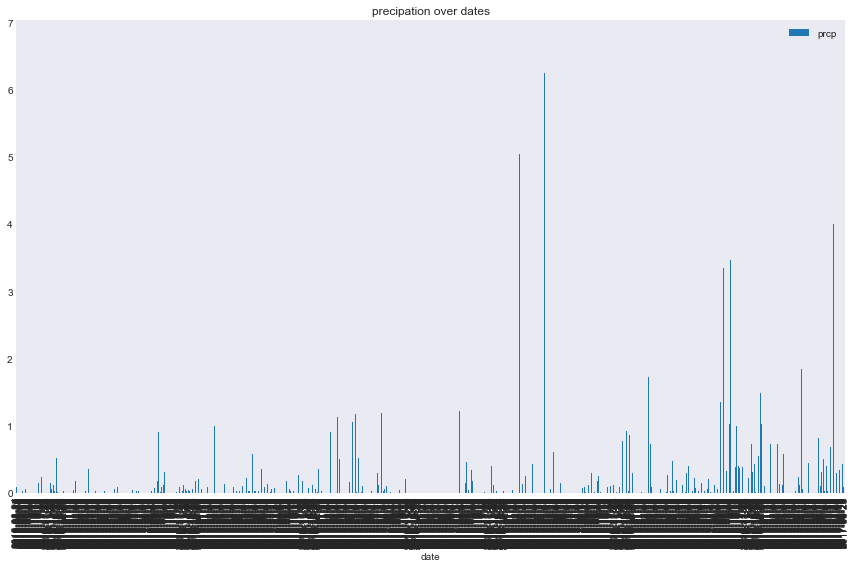

In [243]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

@app.route("/api/v1.0/precipitation")
def precipitation():


results = session.query(Measurement.prcp, Measurement.date).\
 filter(Measurement.date < '2017-8-23').\
 filter(Measurement.date > '2016-08-23').all()
df = pd.DataFrame(results[:], columns=['prcp','date'])
df.set_index('date', inplace=True)
df.plot.bar(figsize=(12,8),title="precipation over dates")
plt.tight_layout()
plt.show()

return jsonify(all_precipitation)


In [158]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [245]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).scalar()

9

In [247]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
@app.route("/api/v1.0/stations")
def stations():
sel = [Measurement.station,Measurement.tobs]
station_tobs =session.query(*sel).order_by(Measurement.tobs.desc()).limit(10).all()
print(station_tobs)

return jsonify(all_stations)


[('USC00519397', 87.0), ('USC00519397', 87.0), ('USC00517948', 87.0), ('USC00511918', 87.0), ('USC00511918', 86.0), ('USC00511918', 86.0), ('USC00511918', 86.0), ('USC00511918', 86.0), ('USC00519397', 85.0), ('USC00519397', 85.0)]


In [161]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).all()

[(53.0, 87.0, 73.09795396419437)]

In [220]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
@app.route("/api/v1.0/tobs")
def tobs():


results=session.query(Measurement.station,Measurement.tobs, Measurement.date).\
     filter(Measurement.date < '2017-8-23').\
     filter(Measurement.date > '2016-08-23').\
     order_by(Measurement.tobs.desc()).\
     filter(Measurement.station == 'USC00519397').all()

results_station= pd.DataFrame(results[:], columns=['Station','Tobs','Date'])
results_station.head()

return jsonify(all_tobs)

,Station,Tobs,Date
0,USC00519397,87.0,2017-05-23
1,USC00519397,83.0,2017-06-12
2,USC00519397,82.0,2016-09-23
3,USC00519397,82.0,2017-07-26
4,USC00519397,82.0,2017-08-22


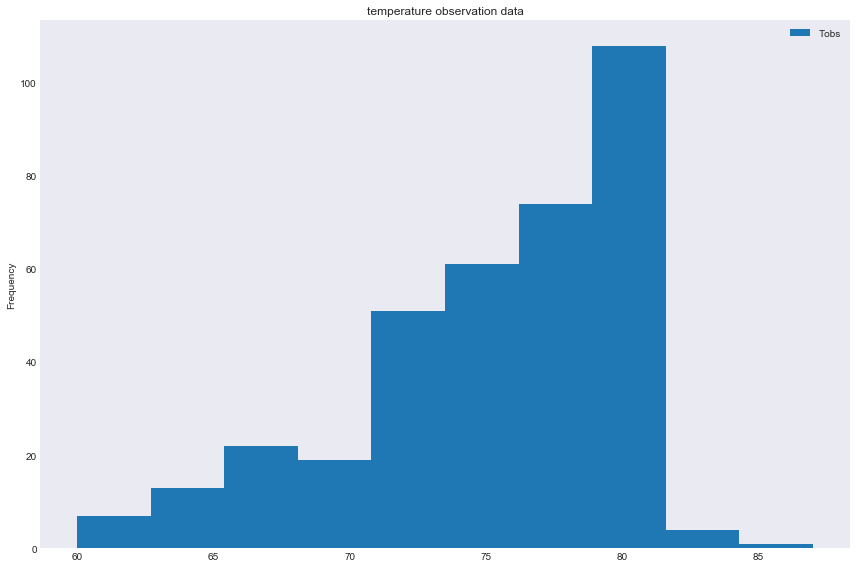

In [221]:
results_station.plot.hist(figsize=(12,8),title="temperature observation data")
plt.tight_layout()
plt.show()

![precipitation](Images/station-histogram.png)

In [251]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
@app.route("/api/v1.0/<start> ")
def <start>():

def calc_temps(start_date, end_date):
   # """TMIN, TAVG, and TMAX for a list of dates.
    
    #Args:
        #start_date (string): A date string in the format %Y-%m-%d
        #end_date (string): A date string in the format %Y-%m-%d
        
    #Returns:
        #TMIN, TAVE, and TMAX
    #"""
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

return jsonify(all_<start>)

[(62.0, 69.57142857142857, 74.0)]


In [252]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
@app.route("/api/v1.0/<start>/<end> ")
def <start>/<end>():

def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
trip_temp = calc_temps('2017-08-07', '2017-08-23')
trip_temp

return jsonify(all_<start>/<end>)


if __name__ == "__main__":
    app.run(debug=True)


[(70.0, 78.74626865671642, 85.0)]

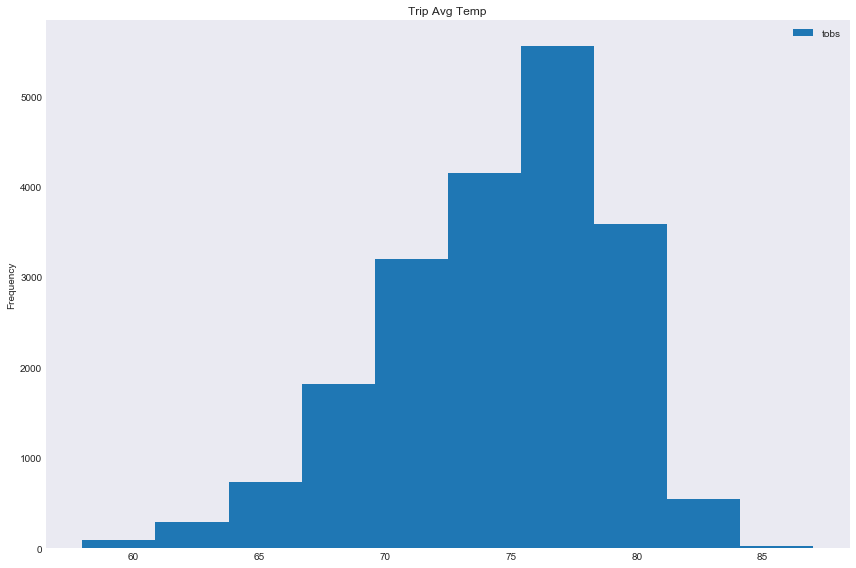

In [131]:
#trip_temp= pd.DataFrame(results[:])
#trip_temp.plot.hist(figsize=(12,8),title="Trip Avg Temp")
#plt.tight_layout()
#plt.show()

In [122]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]
